In [12]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merge_table = pd.merge(ride_data, city_data, on="city")

# Display the data table for preview
merge_table.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

In [13]:
# Obtain the x and y coordinates for each of the three city types
clean_table = merge_table.drop(merge_table.columns[[1,3]], axis=1)
urban_data = clean_table.loc[clean_table["type"]=="Urban",:]
suburban_data = clean_table.loc[clean_table["type"]=="Suburban",:]
rural_data = clean_table.loc[clean_table["type"]=="Rural",:]
# urban
urban_count = urban_data["city"].value_counts()
urban_table = urban_data.groupby("city").sum()
urban_table["Total ride"] =urban_data["city"].value_counts()
urban_table["Average Fare"] = urban_table["fare"]/urban_table["Total ride"]
del urban_table["fare"]

#surburban
suburban_count = suburban_data["city"].value_counts()
suburban_table = suburban_data.groupby("city").sum()
suburban_table["Total ride"] =suburban_data["city"].value_counts()
suburban_table["Average Fare"] = suburban_table["fare"]/suburban_table["Total ride"]
del suburban_table["fare"]

#rural
rural_count = rural_data["city"].value_counts()
rural_table = rural_data.groupby("city").sum()
rural_table["Total ride"] =rural_data["city"].value_counts()
rural_table["Average Fare"] = rural_table["fare"]/rural_table["Total ride"]
del rural_table["fare"]



AttributeError: module 'matplotlib.pyplot' has no attribute 'legend_handler'

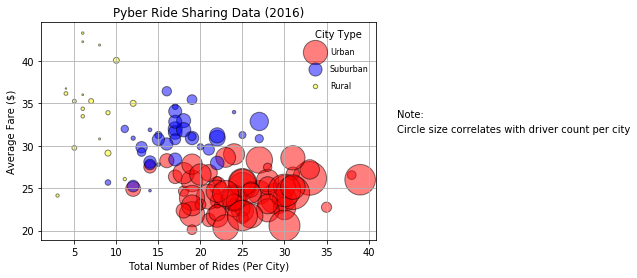

In [18]:
# Build the scatter plots for each city types
urban_chart = plt.scatter(urban_table["Total ride"],urban_table["Average Fare"],marker="o", facecolors="red", edgecolors="black", alpha = 0.5, s=urban_table["driver_count"]/2)
suburban_chart = plt.scatter(suburban_table["Total ride"],suburban_table["Average Fare"],marker="o", facecolors="blue", edgecolors="black", alpha = 0.5, s=suburban_table["driver_count"]/2)
rural_chart = plt.scatter(rural_table["Total ride"],rural_table["Average Fare"],marker="o", facecolors="yellow", edgecolors="black", alpha = 0.5, s=rural_table["driver_count"]/2)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()
plt.figtext(0.95, 0.55, "Note:")
plt.figtext(0.95, 0.5, "Circle size correlates with driver count per city")
plt.legend((urban_chart, suburban_chart, rural_chart),
           ('Urban', 'Suburban', 'Rural'),
           scatterpoints=1,
           frameon=False, labelspacing=1, title='City Type',
           fontsize=8)
for handle in plt.legend_handler:
    handle.set_sizes([6.0])
plt.savefig("../Images/pyber_ride.png")
plt.show()

In [5]:
# Show plot
plt.show()

## Total Fares by City Type

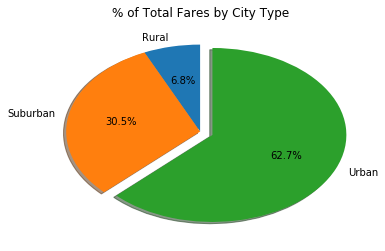

In [6]:
# Calculate Type Percents
total_fares = clean_table.groupby("type").sum()
del total_fares["driver_count"]



# Build Pie Chart
sizes = total_fares["fare"]
labels = total_fares.index
explode = (0, 0, 0.1)
plt.title("% of Total Fares by City Type")
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

plt.savefig("../Images/total fare.png")
plt.show()

# Save Figure


## Total Rides by City Type

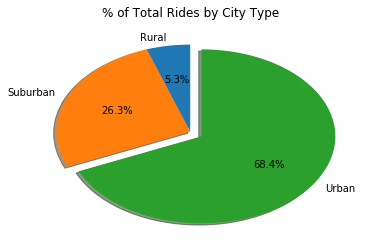

In [7]:
# Calculate Type Percents
total_rides = clean_table.groupby("type").count()
del total_rides["city"]
del total_rides["driver_count"]
total_rides

# Build Pie Chart
sizes = total_rides["fare"]
labels = total_rides.index
explode = (0, 0, 0.1)
plt.title("% of Total Rides by City Type")
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.savefig("../Images/total rides.png")
plt.show()

# Save Figure


## Total Drivers by City Type

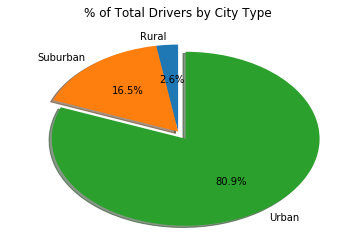

In [8]:
# Calculate Type Percents
clean_drivers = clean_table[["city","driver_count","type"]]
unique_drivers = clean_drivers.drop_duplicates()

total_drivers = unique_drivers.groupby("type").sum()

total_drivers

# Build Pie Chart
sizes = total_drivers["driver_count"]
labels = total_drivers.index
explode = (0, 0, 0.1)
plt.title("% of Total Drivers by City Type")
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.savefig("../Images/total drivers.png")
plt.show()

# Save Figure
